In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


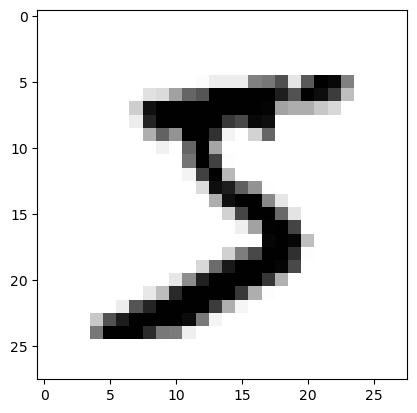

In [3]:
plt.imshow(X_train[0], cmap=plt.cm.gray_r)
plt.show()


In [4]:
for x in X_train[0]:
    for i in x:
        print('{:3d}'.format(i), end='')
    print()


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [5]:
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

print(X_train.dtype, X_test.dtype)

float32 float32


In [6]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2*2의 사이즈 안에 제일 높은 값
model.add(Dropout(0.25))  # 전체의 퍼센테이지(소수점일 때), 또는 몇개(정수개 일떄)
model.add(Flatten())  # 모든 차원 1개호 평탄화
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

path = 'data/model/all/mnist.hdf5'
checkpoint = ModelCheckpoint(path, monitor='val_loss', verbose=0, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=200, callbacks=[checkpoint,earlystop])

# model.evaluate(X_test, y_test, batch_size=200)로 테스트 데이터 정확도 확인
# complie, fit, evaluate

Epoch 1/1000
225/225 [==============================] - 59s 258ms/step - loss: 0.3479 - accuracy: 0.8941 - val_loss: 0.0805 - val_accuracy: 0.9767
Epoch 2/1000
225/225 [==============================] - 65s 287ms/step - loss: 0.1055 - accuracy: 0.9686 - val_loss: 0.0577 - val_accuracy: 0.9818
Epoch 3/1000
225/225 [==============================] - 59s 264ms/step - loss: 0.0758 - accuracy: 0.9775 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 4/1000
225/225 [==============================] - 56s 247ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0476 - val_accuracy: 0.9861
Epoch 5/1000
225/225 [==============================] - 58s 259ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.0563 - val_accuracy: 0.9841
Epoch 6/1000
225/225 [==============================] - 55s 244ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0504 - val_accuracy: 0.9865
Epoch 7/1000
225/225 [==============================] - 55s 247ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0

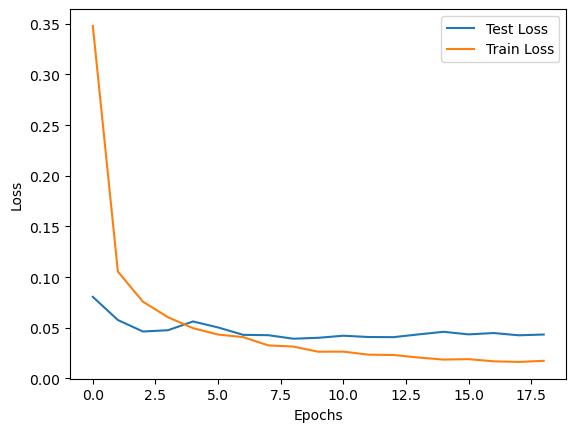

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='Test Loss')
plt.plot(x_len, y_loss, label='Train Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [13]:
print('학습 정확도 : {} \n 검증 정확도 : {} \n 테스트 정확도 : {} \n'.format(history.history['accuracy'][-1], history.history['val_accuracy'][-1], model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.0313 - accuracy: 0.9916
학습 정확도 : 0.9939333200454712 
 검증 정확도 : 0.9896666407585144 
 테스트 정확도 : 0.991599977016449 

